In [44]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import numpy as np
import os
%matplotlib inline
np.seterr(divide='ignore')

error = {   
        'TE01':'Type Error: Requires format = iterble of size 2',
        'TE02':'Type Error: Requires format = float',
        'TE03':'Type Error: Requires format = String',
        'TE04':'Type Error: Requires lists of similar lengths',
        'VE01':'Value Error: Distance has a value of 0'
        }


class ball():
    def __init__(self, position, velocity, mass) -> None:
        if len(position) != 2:
            raise TypeError(error['TE01'])
        else:
            self._position = np.array(position)
        if len(position) != 2:
            raise TypeError(error['TE01'])
        else:
            self._velocity = np.array(velocity)
        if type(mass) == float or type(mass) == int:
            self._mass = float(mass)
        else:
            raise TypeError(error['TE02'])

    @property
    def position(self):
        return self._position
    
    @position.setter
    def position(self, position):
        if len(position) != 2:
            raise TypeError(error['TE01'])
        else:
            self._position = np.array(position)

    @property
    def velocity(self):
        return self._velocity

    @velocity.setter
    def velocity(self, velocity):
        if len(velocity) != 2:
            raise TypeError(error['TE01'])
        else:
            self._velocity = np.array(velocity)               
    
    @property
    def mass(self):
        return self._mass

    @mass.setter
    def mass(self, mass):
        if type(mass) != float:
            raise TypeError(error['TE02'])
        else:
            self._mass = float(mass)   

    def force_between(self, ball, scale = 6.6743 * 10**-11):
        dist = np.linalg.norm(ball.position-self._position)
        vector = ball.position - self._position
        force = scale*self._mass*ball.mass/np.square(dist)
        repulse_force = -0.5*scale*self._mass*ball.mass/(np.square(dist-0.75)-0.1)
        alpha_prime = np.arctan2(*vector[::-1])
        force_vector = (force+repulse_force)*np.array((np.cos(np.arctan(alpha_prime)),np.sin(np.arctan(alpha_prime))))
        return force_vector, -force_vector
    
def update_self(balls, scale, time_step):
    forces = [[] for _ in range(len(balls))]
    for ball in range(len(balls)):
        for other_ball in range(ball+1,len(balls)):
            force_ball, force_other_ball = balls[ball].force_between(balls[other_ball], scale)
            forces[ball].append(force_ball)
            forces[other_ball].append(force_other_ball)
    forces = [sum(force) for force in forces]

    for ind in range(len(balls)):
        balls[ind].velocity = balls[ind].velocity + forces[ind]/balls[ind].mass*time_step
        balls[ind].position = balls[ind].position + balls[ind].velocity*time_step
        if balls[ind].position[0] > 100 or balls[ind].position[0] < 0:
            balls[ind].velocity[0] = -balls[ind].velocity[0]
        if balls[ind].position[1] > 100 or balls[ind].position[1] < 0:
            balls[ind].velocity[1] = -balls[ind].velocity[1]
        balls[ind].position = balls[ind].position + balls[ind].velocity*time_step
    return balls

def update_between(balls, other_balls, scale, time_step):
    if len(balls) != len(other_balls):
        raise TypeError(error['TE04'])
    
    balls_forces = [[] for _ in range(len(balls))]
    other_balls_forces = [[] for _ in range(len(other_balls))]
    
    size = range(len(balls))

    for ball_ind in size:
        for other_ball_ind in size:
            force_ball, force_other_ball = balls[ball_ind].force_between(other_balls[other_ball_ind], scale)
            balls_forces[ball_ind].append(force_ball)
            other_balls_forces[other_ball_ind].append(force_other_ball)
    balls_forces = [sum(force) for force in balls_forces]
    other_balls_forces = [sum(force) for force in other_balls_forces]


    for ind in size:
        balls[ind].velocity = balls[ind].velocity + balls_forces[ind]/balls[ind].mass*time_step
        balls[ind].position = balls[ind].position + balls[ind].velocity*time_step
        if balls[ind].position[0] > 100 or balls[ind].position[0] < 0:
            balls[ind].velocity[0] = -0.5*balls[ind].velocity[0]
        if balls[ind].position[1] > 100 or balls[ind].position[1] < 0:
            balls[ind].velocity[1] = -0.5*balls[ind].velocity[1]
        balls[ind].position = balls[ind].position + balls[ind].velocity*time_step
        
        other_balls[ind].velocity = other_balls[ind].velocity + other_balls_forces[ind]/other_balls[ind].mass*time_step
        other_balls[ind].position = other_balls[ind].position + other_balls[ind].velocity*time_step
        if other_balls[ind].position[0] > 100 or other_balls[ind].position[0] < 0:
            other_balls[ind].velocity[0] = -0.5*other_balls[ind].velocity[0]
        if other_balls[ind].position[1] > 100 or other_balls[ind].position[1] < 0:
            other_balls[ind].velocity[1] = -0.5*other_balls[ind].velocity[1]
        other_balls[ind].position = other_balls[ind].position + other_balls[ind].velocity*time_step
        return balls, other_balls

KeyboardInterrupt: 

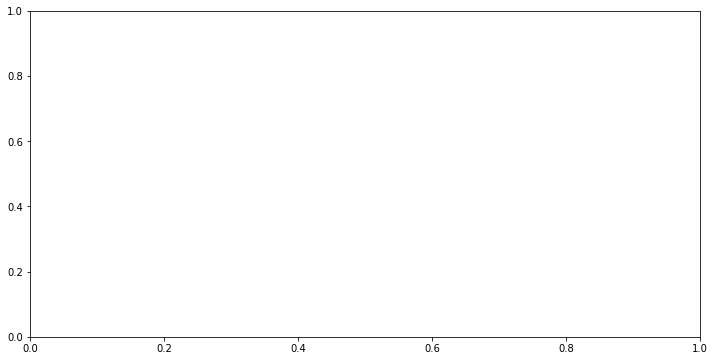

In [45]:
grid_size = 100
mass_scale = 5
velocity_scale = 0
amount_of_balls = 3

green_balls = [ball(grid_size*np.random.random(2),velocity_scale*np.random.random(2),mass_scale*np.random.random()) for _ in range(amount_of_balls)]
red_balls = [ball(grid_size*np.random.random(2),velocity_scale*np.random.random(2),mass_scale*np.random.random()) for _ in range(amount_of_balls)]
yellow_balls = [ball(grid_size*np.random.random(2),velocity_scale*np.random.random(2),mass_scale*np.random.random()) for _ in range(amount_of_balls)]


time_step = 1
green_scale = 6.6743 * 10**-11
red_scale = 6.6743 * 10**-11
yellow_scale = 6.6743 * 10**-11
count = 0

while True:
    count += 1
    green_balls = update_self(green_balls,green_scale,time_step)
    red_balls = update_self(red_balls, red_scale, time_step)
    yellow_balls = update_self(yellow_balls, yellow_scale, time_step)

    green_balls, red_balls = update_between(green_balls, red_balls, red_scale, time_step)
    green_balls, yellow_balls = update_between(green_balls, yellow_balls, yellow_scale, time_step)
    red_balls, yellow_balls = update_between(red_balls, yellow_balls, yellow_scale, time_step)


    x_coords_green_balls = [ball.position[0] for ball in green_balls]
    y_coords_green_balls = [ball.position[1] for ball in green_balls]
    x_coords_red_balls = [ball.position[0] for ball in red_balls]
    y_coords_red_balls = [ball.position[1] for ball in red_balls]
    x_coords_yellow_balls = [ball.position[0] for ball in yellow_balls]
    y_coords_yellow_balls = [ball.position[1] for ball in yellow_balls]
    
    clear_output(wait=True)
    fig, ax = plt.subplots(figsize=(12,6))
    ax.scatter(x_coords_green_balls, y_coords_green_balls,s=[ball.mass for ball in green_balls] , c='g')
    ax.scatter(x_coords_red_balls, y_coords_red_balls, s=[ball.mass for ball in red_balls], c='r')
    ax.scatter(x_coords_yellow_balls, y_coords_yellow_balls, s=[ball.mass for ball in yellow_balls], c='y')
    ax.set_facecolor('k')
    ax.set_xlim([0,grid_size])
    ax.set_ylim([0,grid_size])
    plt.savefig(f"3balls_pics/{count:04d}.png")
    plt.show()

In [ ]:
os.system("ffmpeg -r 60 -i 3balls_pics/%04d.png -vcodec mpeg4 -y movie.mp4")

1